In [1]:
import video_transect, misc
import pathlib
import ffmpeg

In [2]:
# Paths
# transect_dirs = ['/media/mha114/Massimal/Vega_Sola/Transects/Otter/Sola_01/20220820_134500_Sola01b',
#                  '/media/mha114/Massimal/Vega_Sola/Transects/Otter/Sola_02/20220820_160305_Sola02',
#                  '/media/mha114/Massimal/Vega_Sola/Transects/Otter/Sola_03/20220821_142404_Sola03']
# transect_dirs = ['/media/mha114/Massimal/Vega_Sola/Transects/Otter/Test']
transect_dirs = ['/media/mha114/Massimal/Vega_Sola/Transects/Otter/Sola_02/20220820_160305_Sola02']


In [3]:
# Parameters
sample_distance = 1
video_offset_sec = -1751.884 - 3.78 # 3.87 corection based on reviewing images

In [4]:
for tdir in transect_dirs:
    transect_dir = pathlib.Path(tdir)
    video_dir = transect_dir / 'GoPro'
    image_dir = transect_dir / 'Images'
    image_dir.mkdir(exist_ok=True)
    gpkg_dir = transect_dir / 'Images Geopackage'
    gpkg_dir.mkdir(exist_ok=True)
    gpkg_file = gpkg_dir / (transect_dir.stem + '_GeotaggedImages.gpkg')
    csv_file = misc.file_pattern_search(str(transect_dir),'*Gnss*.csv', recursive=True)[0]

    video_files = misc.file_pattern_search(str(video_dir), '*.[Mm][Pp]4')
    video_data = video_transect.get_video_data(str(video_dir))
    
    gdf = video_transect.otter_csv_to_geodataframe(csv_file)
    #gdf = video_transect.filter_gdf_on_distance(gdf,sample_distance)
    #gdf = video_transect.prepare_gdf_with_video_data(gdf,video_data)
    #gdf = video_transect.extract_images_from_video(gdf,str(image_dir))
    #gdf.to_file(gpkg_file, driver="GPKG")
    
    #print(video_files)

In [5]:
video_data = video_data.iloc[0:3]
video_data

,FileName,CreationTime,DurationSec,StartTimeSec,StopTimeSec
0,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,2022-08-20 17:59:20+02:00,531.531,0.000,531.531
1,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,2022-08-20 18:08:12+02:00,531.531,531.531,1063.062
2,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,2022-08-20 18:17:04+02:00,531.531,1063.062,1594.593


In [6]:
gdf

,Time,Lat,Lng,geometry
0,2022-08-20 16:03:05.733000+00:00,65.678561,11.720183,POINT (11.72018 65.67856)
1,2022-08-20 16:03:05.785000+00:00,65.678561,11.720183,POINT (11.72018 65.67856)
2,2022-08-20 16:03:05.897000+00:00,65.678561,11.720183,POINT (11.72018 65.67856)
3,2022-08-20 16:03:05.993000+00:00,65.678561,11.720183,POINT (11.72018 65.67856)
4,2022-08-20 16:03:06.089000+00:00,65.678561,11.720183,POINT (11.72018 65.67856)
...,...,...,...,...
64855,2022-08-20 17:51:11.192000+00:00,65.679131,11.716920,POINT (11.71692 65.67913)
64856,2022-08-20 17:51:11.288000+00:00,65.679131,11.716920,POINT (11.71692 65.67913)
64857,2022-08-20 17:51:11.400000+00:00,65.679131,11.716920,POINT (11.71692 65.67913)
64858,2022-08-20 17:51:11.496000+00:00,65.679131,11.716920,POINT (11.71692 65.67913)


In [7]:
gdf = video_transect.filter_gdf_on_distance(gdf,sample_distance)
gdf

,Time,Lat,Lng,geometry
0,2022-08-20 16:03:05.733000+00:00,65.678561,11.720183,POINT (11.72018 65.67856)
116,2022-08-20 16:03:17.289000+00:00,65.678561,11.720205,POINT (11.72020 65.67856)
189,2022-08-20 16:03:24.584000+00:00,65.678568,11.720219,POINT (11.72022 65.67857)
253,2022-08-20 16:03:31+00:00,65.678576,11.720214,POINT (11.72021 65.67858)
657,2022-08-20 16:04:11.398000+00:00,65.678571,11.720196,POINT (11.72020 65.67857)
...,...,...,...,...
63370,2022-08-20 17:48:42.687000+00:00,65.679153,11.716832,POINT (11.71683 65.67915)
63391,2022-08-20 17:48:44.799000+00:00,65.679150,11.716852,POINT (11.71685 65.67915)
63419,2022-08-20 17:48:47.599000+00:00,65.679146,11.716873,POINT (11.71687 65.67915)
63462,2022-08-20 17:48:51.887000+00:00,65.679142,11.716893,POINT (11.71689 65.67914)


In [8]:
gdf = video_transect.prepare_gdf_with_video_data(gdf,video_data,video_offset_sec=video_offset_sec)
gdf

,Time,Lat,Lng,VideoFile,TimeRelToVideoStart,TimeRelToFileStartSec,geometry
15766,2022-08-20 16:29:22.292000+00:00,65.679117,11.716881,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:00:46.628000,46.628,POINT (11.71688 65.67912)
15800,2022-08-20 16:29:25.684000+00:00,65.679115,11.716860,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:00:50.020000,50.020,POINT (11.71686 65.67911)
15849,2022-08-20 16:29:30.595000+00:00,65.679113,11.716839,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:00:54.931000,54.931,POINT (11.71684 65.67911)
15889,2022-08-20 16:29:34.595000+00:00,65.679114,11.716816,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:00:58.931000,58.931,POINT (11.71682 65.67911)
15899,2022-08-20 16:29:35.588000+00:00,65.679118,11.716796,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:00:59.924000,59.924,POINT (11.71680 65.67912)
...,...,...,...,...,...,...,...
31180,2022-08-20 16:55:03.682000+00:00,65.678337,11.712261,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:26:28.018000,524.956,POINT (11.71226 65.67834)
31195,2022-08-20 16:55:05.186000+00:00,65.678344,11.712275,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:26:29.522000,526.460,POINT (11.71228 65.67834)
31209,2022-08-20 16:55:06.594000+00:00,65.678352,11.712288,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:26:30.930000,527.868,POINT (11.71229 65.67835)
31223,2022-08-20 16:55:07.986000+00:00,65.678359,11.712301,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:26:32.322000,529.260,POINT (11.71230 65.67836)


<AxesSubplot:>

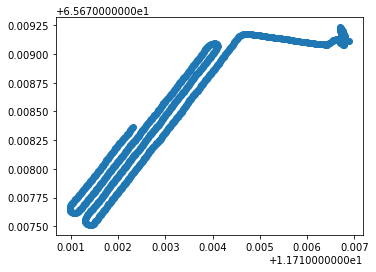

In [9]:
gdf.plot()

In [10]:
video_offset_sec

-1755.664

In [11]:
gdf = video_transect.extract_images_from_video(gdf,str(image_dir))
gdf

100%|█████████████████████████████████████████| 898/898 [06:32<00:00,  2.29it/s]


,Time,Lat,Lng,VideoFile,TimeRelToVideoStart,TimeRelToFileStartSec,ImageFile,geometry
15766,2022-08-20 16:29:22.292000+0000,65.679117,11.716881,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:00:46.628000,46.628,GH017862_00m46s628ms.jpg,POINT (11.71688 65.67912)
15800,2022-08-20 16:29:25.684000+0000,65.679115,11.716860,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:00:50.020000,50.020,GH017862_00m50s020ms.jpg,POINT (11.71686 65.67911)
15849,2022-08-20 16:29:30.595000+0000,65.679113,11.716839,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:00:54.931000,54.931,GH017862_00m54s931ms.jpg,POINT (11.71684 65.67911)
15889,2022-08-20 16:29:34.595000+0000,65.679114,11.716816,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:00:58.931000,58.931,GH017862_00m58s931ms.jpg,POINT (11.71682 65.67911)
15899,2022-08-20 16:29:35.588000+0000,65.679118,11.716796,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:00:59.924000,59.924,GH017862_00m59s924ms.jpg,POINT (11.71680 65.67912)
...,...,...,...,...,...,...,...,...
31180,2022-08-20 16:55:03.682000+0000,65.678337,11.712261,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:26:28.018000,524.956,GH037862_08m44s956ms.jpg,POINT (11.71226 65.67834)
31195,2022-08-20 16:55:05.186000+0000,65.678344,11.712275,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:26:29.522000,526.460,GH037862_08m46s460ms.jpg,POINT (11.71228 65.67834)
31209,2022-08-20 16:55:06.594000+0000,65.678352,11.712288,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:26:30.930000,527.868,GH037862_08m47s868ms.jpg,POINT (11.71229 65.67835)
31223,2022-08-20 16:55:07.986000+0000,65.678359,11.712301,/media/mha114/Massimal/Vega_Sola/Transects/Ott...,0 days 00:26:32.322000,529.260,GH037862_08m49s260ms.jpg,POINT (11.71230 65.67836)


In [12]:
gdf.to_file(gpkg_file, driver="GPKG")

<AxesSubplot:>

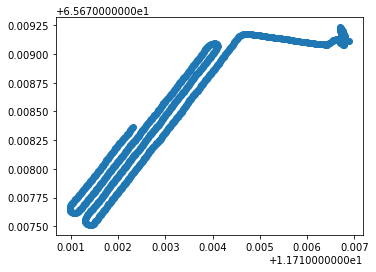

In [13]:
gdf.plot()